# <div align="center">Алгоритм Гиллеспи</div>

Модель авторепрессора:

$$\dot{x}=\displaystyle\frac{\alpha}{1+x^n}-x$$

## Алгоритм:

1.  Вычисление коэффициентов:

    1.1 считаем кинетические коэффициенты $r_i=[\displaystyle\frac{\alpha}{1+x^n};x]$

    $\displaystyle\frac{\alpha}{1+x^n}: \quad x\rightarrow x+1$ соотвествует образованию белка

    $x: \quad x\rightarrow x-1$ соотвествует разрушению белка
    
    1.2 Считаем общий кинетический коэффициент $\lambda = \displaystyle\sum_i r_i = \displaystyle\frac{\alpha}{1+x^n} + x $


2. Вычисление следующего времени реакции:

    2.1 генерируем случайное число $q_1\in [0,1]$ (равномерное распределение)

    2.2 Получаем $\tau = \displaystyle\frac{1}{\lambda}\ln{\displaystyle\frac{1}{q_1}} \rightarrow$ следующее время реакции


3. Выбор реакции:

    3.1 считаем вероятности образования реакций:

    $P(x\rightarrow x+1) = \displaystyle\frac{1}{\lambda} (\displaystyle\frac{\alpha}{1+x^n}) = P_1$
    
    $P(x\rightarrow x-1) = \displaystyle\frac{x}{\lambda} = P_2$

    3.2 Генерируем случайное число $q_2\in[0,1]$ :
    - если $ 0 \lt q_2 \leq P_1 \Rightarrow x\rightarrow x+1$
    - если $ P_1 \lt q_2 \leq P_1+P_2 \Rightarrow x\rightarrow x-1$

4. Обновляем $x$ и $t$

5. Повторяем п. 1-4

## Реализация

In [131]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [132]:
# Модель авторепрессора
def dxdt(x, t, alpha, n):
    return (alpha / (1 + x**n)) - x

# Параметры модели
alpha = 0.2
n = 4
x0 = 10
t_max = 20
num_points = 100

random.seed(0)

# Численное решение
t_numeric = np.linspace(0, t_max, num_points)
x_numeric = odeint(dxdt, x0, t_numeric, args=(alpha, n))


# Моделирование методом Гиллеспи
x_gillespie = [x0]
t_gillespie = [0]

for _ in range(num_points - 1):
    r1 = alpha / (1 + x_gillespie[-1]**n)
    r2 = x_gillespie[-1]
    Lambda = r1 + r2

    q1 = random.uniform(0, 1)
    q2 = random.uniform(0, 1)

    tau = (1/Lambda)*(math.log(1/q1))
    t_gillespie.append(t_gillespie[-1] + tau)

    # Определение реакции, которая произойдет
    P1 = (alpha / (1 + x_gillespie[-1]**n)) * (1 / Lambda)
    P2 = x_gillespie[-1]/Lambda
    
    if (0 < q2) and (q2 <= P1):
        x_gillespie.append(x_gillespie[-1] + 1)

    elif (P1 < q2) and (q2 <= P1+P2):
        x_gillespie.append(x_gillespie[-1] - 1)

## Визуализация

Через plot оба графика

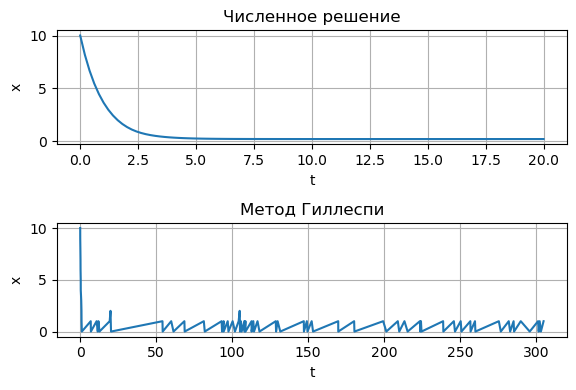

In [133]:
fig, axs = plt.subplots(2, 1, figsize=(6, 4))

# Отображение численного решения
axs[0].plot(t_numeric, x_numeric, label='Численное решение')
axs[0].set_title('Численное решение')
axs[0].set_xlabel('t')
axs[0].set_ylabel('x')
axs[0].grid(True)

# Отображение решения методом Гиллеспи
axs[1].plot(t_gillespie, x_gillespie, label='Метод Гиллеспи')
axs[1].set_title('Метод Гиллеспи')
axs[1].set_xlabel('t')
axs[1].set_ylabel('x')
axs[1].grid(True)

plt.tight_layout()
plt.show()


В случае метода Гиллеспи, где мы имеем дискретные моменты времени, ступенчатый график (step) наиболее подходит для визуализации 

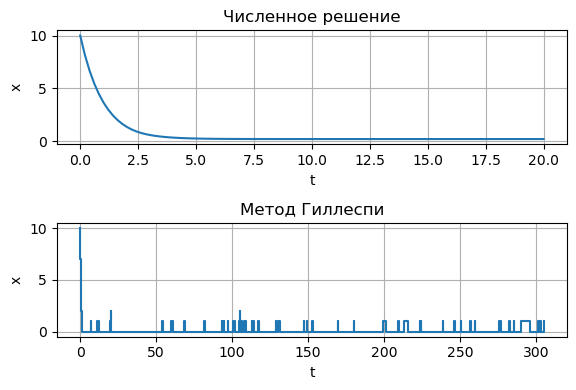

In [134]:
fig, axs = plt.subplots(2, 1, figsize=(6, 4))

# Отображение численного решения
axs[0].plot(t_numeric, x_numeric, label='Численное решение')
axs[0].set_title('Численное решение')
axs[0].set_xlabel('t')
axs[0].set_ylabel('x')
axs[0].grid(True)

# Отображение решения методом Гиллеспи
axs[1].step(t_gillespie, x_gillespie, where='post', label='Метод Гиллеспи')
axs[1].set_title('Метод Гиллеспи')
axs[1].set_xlabel('t')
axs[1].set_ylabel('x')
axs[1].grid(True)

plt.tight_layout()
plt.show()


Еще вариант визуализации  преобразовать результаты метода Гиллеспи так, чтобы они были непрерывными во времени. Например, можно использовать функцию np.interp для интерполяции значений между шагами метода Гиллеспи.

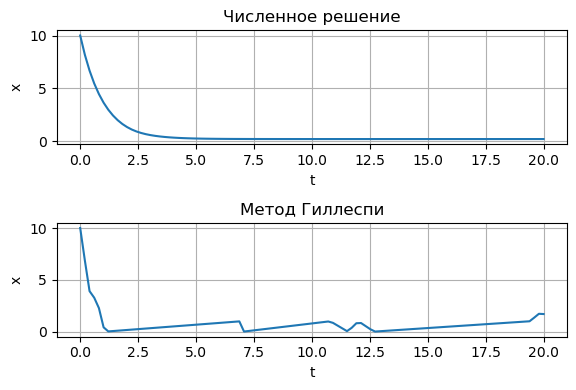

In [135]:
fig, axs = plt.subplots(2, 1, figsize=(6, 4))

# Отображение численного решения
axs[0].plot(t_numeric, x_numeric, label='Численное решение')
axs[0].set_title('Численное решение')
axs[0].set_xlabel('t')
axs[0].set_ylabel('x')
axs[0].grid(True)

# Интерполяция результатов метода Гиллеспи для непрерывного представления
t_gillespie_interp = np.linspace(0, t_max, len(x_gillespie))
x_gillespie_interp = np.interp(t_gillespie_interp, t_gillespie, x_gillespie)

# Отображение решения методом Гиллеспи
axs[1].plot(t_gillespie_interp, x_gillespie_interp, label='Метод Гиллеспи')
axs[1].set_title('Метод Гиллеспи')
axs[1].set_xlabel('t')
axs[1].set_ylabel('x')
axs[1].grid(True)

plt.tight_layout()
plt.show()
